In [149]:
# 1) Read the data into pandas dataframe
import pandas as pd

df = pd.read_csv('Auto.csv', delimiter=',')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [150]:
# 2) Setup multiple regression X and y to predict 'mpg' of cars using all the variables except 'mpg', 'name' and 'origin'
X = df.drop(columns=['mpg', 'name', 'origin'])
y = df[['mpg']]

In [151]:
# 3) Split data into training and testing sets (80/20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

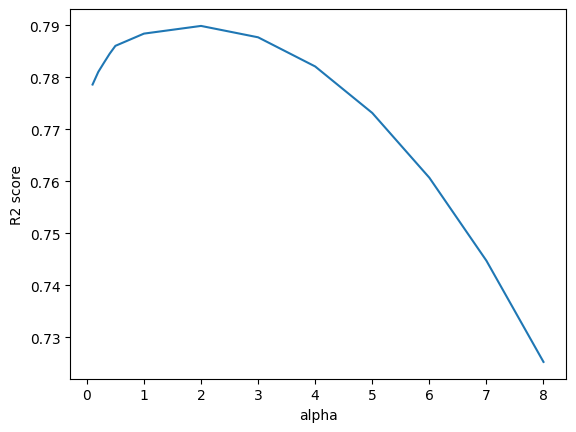


Best R2 = 0.7898622361369411, Best alpha = 2


In [152]:
# 4) Implement both ridge regression and LASSO regression using several values for alpha
# 5) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

alphas = [0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8]
lasso_scores = []
for alp in alphas:
  lasso = Lasso(alpha=alp)
  lasso.fit(X_train, y_train)
  # print(lasso.coef_.round(2),lasso.intercept_)
  lsc = lasso.score(X_test, y_test)
  lasso_scores.append(lsc)
  # print("alpha=",alp," lasso score:", lsc)

# 6) Plot the R2 scores for both regressors as functions of alpha    
plt.plot(alphas, lasso_scores)
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.show()

# 7) Identify, as accurately as you can, the value for alpha which gives the best score
best_r2 = max(lasso_scores)
idx = lasso_scores.index(best_r2)
best_alp = alphas[idx]
print(f"\nBest R2 = {best_r2}, Best alpha = {best_alp}")

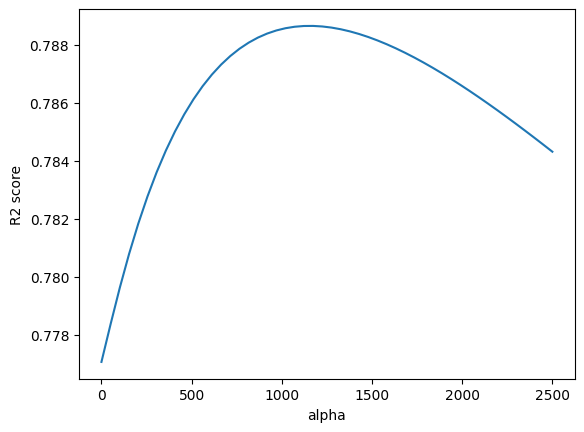


Best R2 = 0.7886591592444093, Best alpha = 1173.4693877551022


In [153]:
# 4) Implement both ridge regression and LASSO regression using several values for alpha
# 5) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data
from sklearn.metrics import r2_score
import numpy as np
alphas = np.linspace(0,2500,50) 
ridge_scores = []
for alp in alphas:
  ridge = Ridge(alpha=alp)
  ridge.fit(X_train, y_train)
  # print(ridge.coef_.round(2),ridge.intercept_)
  # rsc = r2_score(y_test, ridge.predict(X_test))
  rsc = ridge.score(X_test, y_test)
  ridge_scores.append(rsc)
  # print("alpha=",alp," lasso score:", rsc)
     
# 6) Plot the R2 scores for both regressors as functions of alpha    
plt.plot(alphas, ridge_scores)
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.show()

# 7) Identify, as accurately as you can, the value for alpha which gives the best score
best_ridge_r2 = max(ridge_scores)
idx_ridge = ridge_scores.index(best_ridge_r2)
best_ridge_alp = alphas[idx_ridge]
print(f"\nBest R2 = {best_ridge_r2}, Best alpha = {best_ridge_alp}")